# NLP_GoingDeeper | 06. History of Machine Translation
- 기계 번역이 발전해 온 과거의 시간을 살펴보고, 지금에 이르러 사용되는 여러가지 테크닉을 공부합니다. 
- 학습목표
    1. 번역 모델이 발전해 온 과정을 살펴본다
    2. 번역을 생성하는 여러 가지 방법을 이해한다
    3. 주어진 데이터로 더 높은 성능을 만들어 내는 법을 배운다
    4. 자연어 처리의 성능을 측정하기 위한 지표를 배운다
---

# 1. 번역의 흐름
## 1-1. 규칙 기반 기계 번역
- '나는' 이라는 어절을 번역할 때, I am 또는 I'm이라고 번역합니다. 
- '너는' 이라는 어절은 You am 이 아닌, You are 또는 You're 으로 번역할 수 있습니다.
- 나+는 과 너+는 모두 '는'을 포함하는데, 영문에서는 '는'이 am과 are로 나뉘게 됩니다. 때문에 는=am 또는 는=are이라고 정의할 수 없으며, 먼저 등장하는 단어가 '나'인지 '너'인지에 따라 분기를 나눠줘야 하는 것입니다. 
- 이처럼 번역할 때 경우의 수를 직접 정의해 주는 방식이 **규칙 기반 기계 번역(RBMT, Rule-Based Machine Translation)** 입니다. 
- 이 수많은 규칙들은 모두 언어학을 기반으로 하기 때문에, 개발 과정에 언어학자가 동반되어야 했습니다. 
- 그리고 첫 성과가 난 것은 1954년, 미국의 조지타운대와 IBM이 직접 정의한 언어 규칙을 통해 60개의 러시아어 문장을 영어로 번역하는 데에 성공합니다!
- [ '조지타운-IBM 실험' 시연](https://m.blog.naver.com/newheater/2217630314200)
- 한계 : 규칙에 없는 문장이 들어올 경우 번역이 불가능하고 유연성이 떨어지며, 무엇보다 모든 규칙을 정의하는 과정이 너무나도 복잡하고 오랜 시간이 필요 합니다

## 2-2. 통계적 기계 번역
- 1988년에 IBM이 Model 1을 통해 새로운 번역 방식을 선보였는데, 수많은 데이터로부터 통계적 확률을 구해 번역을 진행하는 통계적 기계 번역(SMT, Statistical Machine Translation)입니다.
- 통계적 기계 번역은 통계적 언어 모델(SLM, Statistical Language Model)을 기반으로 동작합니다.
- 조건부 확률의 연쇄법칙에 따르면, 문장의 확률은 각 단어들이 이전 단어가 주어졌을 때 다음 단어로 등장할 확률의 곱으로 구성됩니다. 
- 통계적 모델의 장점 
    - 일일이 규칙을 정의해야 하는 규칙 기반 모델보다 개발에 대한 Cost가 훨씬 적다.
    - 많은 데이터가 뒷받침될 경우, 훨씬 더 유연한 문장 생성이 가능하다(많이 사용되는 문장).
- 통계적 모델의 한계점
    - 본 적이 없는 문장에 대한 모델링이 불가능하다. 즉 데이터 의존적이다.
    - 문장의 어순에 대한 고려가 없기 때문에 다소 어색한 문장이 생성될 수 있다.

- 참고 : [통계적 언어 모델](https://wikidocs.net/21687)
- 희소 문제란 (sparsity problem) 목표하는 문장이 훈련 데이터에 없었던 시퀀스일 경우 올바른 문장임에도 확률이 0 으로 정의되는 문장압니다. 즉 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제입니다. 
- "문장이 존재할 확률을 측정한다."
- 통계적 언어모델을 확용한 SMT는 자연스러운 문장을 생성하는 것뿐만 아니라 번역문의 문법 구조도 고려해야 하기 때문에 단순히 P(Target|Source)만을 고려해서는 안됩니다. 
- 원문과 번역문, 각 단어 간의 **매핑 관계**를 추가로 고려해야 하는데, 그 관계를 **정렬(Alignment)**라고 부릅니다. 
- 정렬에는 퍼틸리티(Fertility)와 왜곡(Distortion) 두가지 요소가 포함됩니다.
- **퍼틸리티**는 직역하면 '출생률' 인데, **원문의 각 단어가 번역 후에 몇 개의 단어로 나타나는지**를 의미하는 값입니다. 
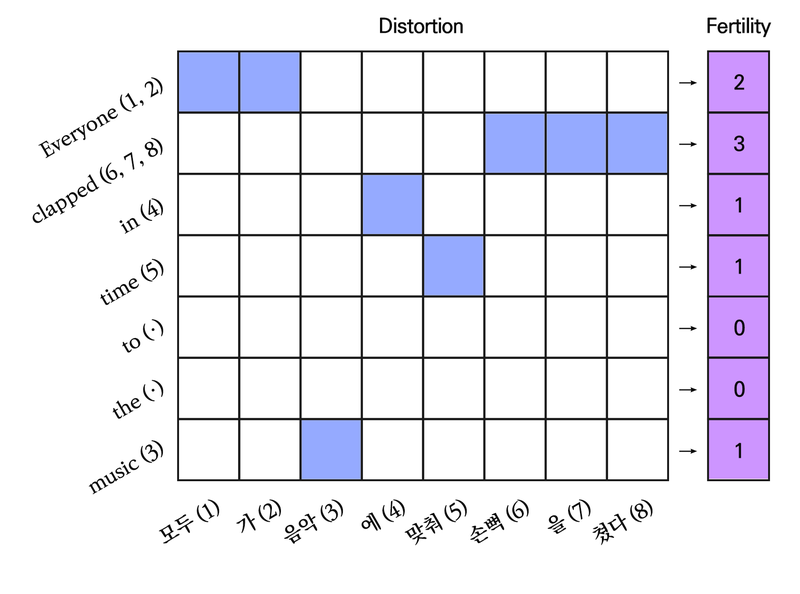
    
    - 위 예시에 따르면, Everyone의 퍼틸리티는 2(모두,가)이고, Clapped의 퍼틸리티는 3(손뼉,을,쳤다)입니다. 그리고 to, the 의 퍼틸리티는 0(번역에 직접적으로 등장하지 않음)입니다. 
    - 퍼틸리티에 대한 확률은 p(n|w)로 정의되며 n은 퍼틸리티 값, w는 원문의 단어입니다. 
    - music은 높은 확률로 음악으로만 번역될테니 p(1|music) = 0.9 정도로 표현할 수 있습니다. 

- 왜곡은 원문의 단어가 번역문에서 존재하는 위치를 나타냅니다. 
    - 위 예시에서 Clapped는 손뼉(6) 을(7) 쳤다(8)로 번역되므로 Clapped의 왜곡은 (6,7,8)로 나타납니다. 
    - 왜곡에 대한 확률은 p(t|s,l)로 정의되며 t는 번역문에서 각 단어의 위치, s는 원문에서 각 단어의 위치, 그리고 l 은 번역문의 길이입니다. 
    - Everyone(1)으로 시작하는 문장은 모두(1) / 가(2) 라고 번역될 확률이 높으므로 p(1|1,8) x p(2|1,8) 역시 제법 높을 것을 추측할 수 있습니다.

- 통계적 언어 모델에서 파생된 확률에 위 모든 확률을 곱하여 학습하는 것이 바로 통계적기계번역입니다. 
 
---
```
E: Everyone(1, 2) clapped(6, 7, 8) in(4) time(5) to(·) the(·) music(3)
    -> K: 모두(1) 가(2) 음악(3) 에(4) 맞춰(5) 손뼉(6) 을(7) 쳤다(8)
	p(E|K) =
	{p(2|Everyone) x p(1|1, 8) x p(2|1, 8) x p(모두|Everyone) x p(가|Everyone)} x
	{p(3|clapped) x p(6|2, 8) x p(7|2, 8) x p(8|2, 8) x p(손뼉|clapped) x p(을|clapped) x p(쳤다|clapped)} x
	{p(1|in) x p(4|3, 8) x p(에|in)} x
	{p(1|time) x p(5|4, 8) x p(맞춰|time)} x
	{p(0|to) x} x
	{p(0|the) x} x
	{p(1|music) x p(3|7, 8) x p(음악|music)}

```
- 이처럼 단하나의 단어를 기반으로 정렬 값을 구하는 것이 아니라, in time to를 묶어서 한번에 ~에 맞춰 와 같이 번역하는 **"두 단어 이상으로 정렬을 구하는 구문 기반 번역(PBMT, Phrase Based Machine Translation)"** 방법은 규칙 기반 번역과 결합하여 하이브리드로 사용되기도 했습니다. 
- 이후 seq2seq나 transformer와 같이 **신경망 기계 번역(Neural Machine Translation)**에 활용되는 대표적인 모델이 등장하게됩니다.  

# 2. 다양한 문장생성 기법
## 2-1. Greedy Decoding

In [1]:
def generate_text(model, tokenizer, init_sentence="<start>", max_len=20):
    test_input = tokenizer.texts_to_sequences([init_sentence])
    test_tensor = tf.convert_to_tensor(test_input, dtype=tf.int64)

    end_token = tokenizer.word_index["<end>"]

    while True:
        predict = model(test_tensor)
        predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]

        test_tensor = tf.concat([test_tensor, tf.expand_dims(predict_word, axis=0)], axis=-1)

        if predict_word.numpy()[0] == end_token: break
        if test_tensor.shape[1] >= max_len: break

    generated = ""
    for word_index in test_tensor[0].numpy():
        generated += tokenizer.index_word[word_index] + " "

    return generated

- 함수 generate_text는 훈련시킨 모델이 문장을 생성할 수 있게 해주는 함수입니다. 
- 우리가 주목해야 하는 부분은 단어를 결정하는 부분입니다.
- predict_word = tf.argmax(tf.nn.softmax(predict, axis=-1), axis=-1)[:, -1]
- 모델이 예측한 predict값을 Softmax를 통해 확률값으로 변환한 후, 가장 높은 확률값을 갖는 단어가 다음 단어로 결정되는 것입니다. 
- 이는 탐욕 알고리즘(Greedy Algorithm)이 사용된 것입니다. 
    - 탐욕 알고리즘이란 미리 정한 기준에 따라서 매번 가장 좋아 보이는 답을 선택하는 알고리즘입니다. 
- 탐욕적인 방법으로 문장을 Decoding 하기 때문에 Greedy Decoding이라고 합니다. 
- 탐욕적인 방법은 효율적이지만 최적의 해를 구해준다는 보장은 없습니다.
- 예를 들어 실제세계에서는 굳이 계산하지 않더라도 Can i have some coffee -> 커피를 한 잔 가져도 될까요? 보다 '커피를 한잔 마셔도 될까요'가 높은 확률로 존재할 것을 예상할 수 있습니다.  
- 하지만 훈련 데이터는 실제 세계의 모든 데이터를 포함할 수는 없기 때문에, have 가 마시다로 사용되는 경우가 훈련 데이터 적거나 없었다면, 탐욕적 방법은 have를 가장 높은 확률은 갖는 '가지다' 로 번역하게 될 것입니다. 


## 2-2. Beam Search
-  Source Sentence와 Target Sentence의 일부가 주어졌을 때, 다음 단어로 가장 높은 확률의 단어를 즉시 택하는 것을 Greedy Decoding이라 합니다.
- Beam Search는 Greedy Decoding의 발전된 형태로, 두 번째, 세 번째(범위는 Beam Size에 의해 결정)로 높은 확률의 단어도 택해 문장을 ‘만들어 봅니다’. 그리고 최종적으로 만들어진 문장들의 확률의 총합을 구하여 가장 높은 값을 갖는 문장을 생성합니다.
- beam search는 단어 사전으로 만들 수 있는 모든 문장을 만드는 대신, 지금 상황에서 가장 높은 확률을 갖는 Top-k 문장만 남기게 됩니다. 
- 상위 몇개의 문장을 기억할지는 beam size(beam width)로 정의할 수 있습니다. 
- beam size는 연산량과 성능 간의 Trade-off 관계를 가지고 있습니다. 즉 자원이 무한하다면 beam size를 키우면 키울수록 성능이 좋아집니다. 직접 실험을 통해 찾아보는 것이 좋으나 대체로 5, 10을 적합한 값으로 택하곤 합니다. 
-  고정된 개수의 문장을 얻지 않아도 된다면 적당한 Beam Size를 설정해 준 후 Score를 기준으로 필터링하는 방법도 가능합니다. 
- 이때, Beam Search는 사람이 직접 좋은 번역을 고를 수 있게 상위 K개의 결과를 보여줄 뿐이라서 학습에 직접적으로 적용할 수는 없기 때문에, 모델학습 단계에서 Beam Search를 사용하지는 않습니다. 

In [2]:
import math
import numpy as np

def beam_search_decoder(prob, beam_size):
    sequences = [[[], 1.0]] #- 생성된 문장과 점수를 저장
    
    for tok in prob:
        all_candidates = []
        
        for seq, score in sequences:
            for idx, p in enumerate(tok): #- 각 단어의 확률을 총점에 누적 곱
                candidate = [seq + [idx], score*-math.log(-(p-1))]
                all_candidates.append(candidate)
        
        ordered = sorted(all_candidates,
                        key=lambda tup:tup[1],
                        reverse=True) #- 총점 순 정렬
        
        sequences = ordered[:beam_size] #- Beam Size에 해당하는 문장만 저장
        
    return sequences

In [3]:
vocab = {
    0: "<pad>",
    1: "까요?",
    2: "커피",
    3: "마셔",
    4: "가져",
    5: "될",
    6: "를",
    7: "한",
    8: "잔",
    9: "도",
}

prob_seq = [[0.01, 0.01, 0.60, 0.32, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
            [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.75, 0.01, 0.01, 0.17],
            [0.01, 0.01, 0.01, 0.35, 0.48, 0.10, 0.01, 0.01, 0.01, 0.01],
            [0.24, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.68],
            [0.01, 0.01, 0.12, 0.01, 0.01, 0.80, 0.01, 0.01, 0.01, 0.01],
            [0.01, 0.81, 0.01, 0.01, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01],
            [0.70, 0.22, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
            [0.91, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]

prob_seq = np.array(prob_seq)
beam_size = 3

result = beam_search_decoder(prob_seq, beam_size)

for seq, score in result:
    sentence = ""

    for word in seq:
        sentence += vocab[word] + " "

    print(sentence, "// Score: %.4f" % score)

커피 를 가져 도 될 까요? <pad> <pad> <pad> <pad>  // Score: 42.5243
커피 를 마셔 도 될 까요? <pad> <pad> <pad> <pad>  // Score: 28.0135
마셔 를 가져 도 될 까요? <pad> <pad> <pad> <pad>  // Score: 17.8983


## 2-3. Sampling
- 앞서 살펴본 Greedy decoding 및 Beam Search는다음의 단어로 나올 확률이 높은 단어를 선택하는 방식이었습니다. 
- 이 방식은 동일한 입력에 대해 늘 동일한 결과가 만들어지기에 안정적이라고 할 있지만, 작문과는 거리가 있습니다.
- 어떻게 하면 새로우면서 의미가 유지되는 문장을 만들 수 있을까요? 확률적으로 단어를 뽑는 방법이 있습니다. 
- 언어모델은 반복적으로 다음 단어에 대한 확률 분포를 생성하기 때문에, 그 확률 분포를 기반으로 랜덤하게 단어를 뽑을 수 있습니다. 
- 그러나 Sampling은 간혹 정말 난해한 문장을 생성할 수도 있기 때문에 실제 서비스에서는 거의 사용되지 않습니다. 
- 대신 모델을 학습시킬 때 사용되는 경우가 있습니다. Back Translation(역번역)이 대표적 사례입니다. 
- 또한 강화학습의 입실론 그리디(E-Greedy)와도 궤를 함께하기 떄문에, 자연어 처리에 강화 학습을 적용한 경우에 활용되기도 합니다. 

# 3. Data Augmentation
- data augmentation 은 데이터 증가, 데이터 확대 등으로 직역되며, 훈련 데이터를 수십 배까지도 부풀리는 기술을 의미합니다. 주로 이미지 처리 영역에서 많이 사용됩니다. 
    - augmentation은 원래 데이터를 부풀려서 성능을 더 좋게 만든다는 뜻입니다. 
    - 대표적인 사례로, VGG-D모델에서 256x256데이터를 넣어주는 것보다 똑같은 사진을 256x256과 512x512 데이터를 따로 넣어주는 것이 미묘하지만 성능이 올라갔습니다. 
    - augmentation은 원본에 추가되는 개념으로 성능이 떨어지지 않으며, 쉽고 패턴이 정해져있기 때문에 단기간에 성능을 올리고 싶을때는 1)Transfer learning 2)Augmentation으로 해결할 수 있습니다. 
        - 좌우 반전 (Flipping과 중복): 이미지를 좌우로 반전시킨다.
        - Crop: 이미지의 특정 부분을 잘라낸다.
        - 밝기 조절: 이미지의 밝기를 변화시킨다.
        - Rotation: 이미지를 0 ~ 360도 회전시킨다.
        - Shifting: 이미지를 약 10px 움직인다. 끝단이 잘려 나가는 효과가 있다.
        - Rescaling: 이미지를 1.0 ~ 1.6배 키운다.
        - Flipping: 이미지를 상하 / 좌우 반전을 한다.
        - Shearing: 약 -20 ~ 20도 정도로 이미지를 찌그러트린다.
        - Stretching: 이미지를 가로 / 세로 약 1.0 ~ 1.3배 늘린다.    
    - 참고 : [augmentation](https://nittaku.tistory.com/272)

- 자연어 처리에서는 어떻게 augmentation을 적용할까요? 

## 3-1. Lexical Substitution
- Lexical Substitution은 '어휘 대체'로 직역됩니다.
- 이때, 대체할 어휘를 선정하는 기준에 따라서 기법이 세부적으로 나뉘게 됩니다. 
- 총 3가지 방법을 알아보겠습니다. 

### 동의어 기반 대체
- 시소러스(Thesaurus)란, 어떤 단어의 동의어나 유의어를 집중적으로 구축해놓은 사전을 의미합니다. 동의어 기반 대체는 이 시소러스를 활용한 방법입니다. 대표적인 시소러스로는 [워드넷(WordNet)](https://kh-kim.gitbook.io/natural-language-processing-with-pytorch/00-cover-4/03-wordnet)이 있습니다. 
    - 워드넷(WordNet)은 1985년부터 심리학 교수인 조지 아미티지 밀러George Armitage Miller 교수의 지도 아래 프린스턴 대학교에서 만드는 프로그램입니다.
    - 워드넷은 단어별 여러 가지 가능한 의미를 미리 정의하고 번호를 매겨 놓았습니다.
    - 또한 의미별로 비슷한 뜻의 동의어를 링크해 동의어 집합을 제공합니다.
    - 처음에는 주로 기계번역을 돕기 위한 목적으로 만들어졌으며, 따라서 '동의어 집합' 또는 '상위어'나 '하위어'에 관한 정보가 특히 잘 구축되어 있다는 장점이 있습니다.
    - 한 노드가 여러 개의 상위 노드를 가질 수 있기 때문에 트리구조가 아닌 유향 비순환 그래프 형태로 구축되었습니다. 
    - 한국어를 위한 워드넷이 존재합니다. => [Busan univ. KorLex](http://korlex.pusan.ac.kr/), [Kaist Korean WordNet(KWN)](http://wordnet.kaist.ac.kr/)
    - 시소러스 기반의 정보를 활용하여 단어 간 유사도를 구할 수 있습니다. 
- 동의어를 기반으로 대체하는 것은 좋은 방법이지만, 규칙기반 기계번역처럼 모든 것을 사람이 정의해야 한다는 단점이 있습니다. 

### Embedding 활용 대체
- Pre-training Word Embedding을 활용할 수 있습니다. 
- Word2Vec이나 GloVe 등의 기법들을 통해 학습된 Embedding은 유사한 단어들끼리 비슷한 공간에 밀집되어 있습니다. 
- 사람이 일일이 정의한 데이터베이스 대신, Embedding의 유사도를 기반으로 단어를 대체하면 훨씬 편리할 것입니다. 
- gensim 라이브러리의 most_similar()함수를 활용하면 단어를 유사도 순으로 정렬할 수 있습니다.

### TF-IDF 기반 대체
- TF-IDF는 여러 문서를 기반으로 단어마다 중요도를 부여하는 알고리즘입니다.
- 이때 낮은 TF-IDF 값을 갖는 단어들은 핵심 단어가 아니기 때문에 다른 단어로 대체해도 문맥이 크게 변하지 않는다는 것을 활용할 수 있습니다. 

## 3-2. Back Translation
- Back Translation은 단일 언어 데이터는 구하기 쉽고 많지만 **병렬 쌍을 이룬 언어 데이터를 찾기는 어렵다는 문제**를 해결하고자 등장했습니다. 
- 번역 모델에 단일 언어 데이터를 학습시키는 방법입니다. 
- Sequence-to-Sequence의 구조를 되새겨보면, Source 문장을 Encoding 하는 부분과 Target 문장을 Decoding 하는 부분을 분리하여 모듈들이 각 언어를 더 잘 처리할 수 있게 했었습니다. 
- 그렇다면 Encoder에는 Source 언어로된 문장을, Decoder에는 Target언어로 된 문장을 더 훈련시키면 어떨까요? 
- 참고 : [back translation](https://dev-sngwn.github.io/2020-01-07-back-translation/)
    - back translation은 적당한 양의 병렬 데이터만 있으면 활용이 가능합니다. 

- S(Source)-T(Target) 병렬 말뭉치가 있다고 가정하면, S->T 방향 번역 모델 A를 학습함과 동시에 T->S 방향 번역 모델 B도 동시에 학습합니다. 후에 T 언어로 된 단일 언어 데이터에 모델 B를 활용해 인공적인 S 언어 데이터를 생성하고 인공적인 S 언어 데이터와 T를 병렬 쌍으로 사용합니다. 이때 생성되는 인공적인 S 언어 데이터가 Synthetic Source Sentence입니다.
- Back Translation을 적용할 때 Beam Search에 Noise를 추가한 Beam + Noise가 가장 좋은 성능을 보였습니다.
- Back Translation는 데이터 수에 무관하게 효과적이며, Sampling 기법으로 생성한 Back Translation이 효과적인 최소 데이터 수는 64만개 이상입니다.
- 변환할 단어를 선정하고 유사한 단어로 대체하던 기존 방식과는 사뭇 다릅니다.
- 딥러닝 모델을 사용한다는 점이 이미지 처리에서 GAN으로 Augmentation 하는 것을 떠올리게 합니다. 
- Back Translation은 현재 번역 데이터셋으로 가장 유명한 WMT2014에서 State-of-the-art 성능을 보인 알고리즘입니다.

# 4. Random Noise Injection
- 데이터에 포함된 적당한 노이즈는 때때로 학습에 도움이 되기도 합니다.
- 그런 의미에서 문장에 노이즈를 주는 것도 괜찮은 Augmentation 기법이 될 수 있습니다.

## 4-1. 오타 노이즈 추가
- 채팅 중 ㅋㅋㅋㄱㄱㅋㅋㄱ 와 ㅋㅋㅌㅋㅌㅌㅋㅋ에서 전자는 천지인 자판을 쓰고 있고 후자는 QWERTY 자판을 쓴다는 사실을 알 수 있습니다. 
- 타이핑을 할 때 주변 키가 눌려 발생하는 오타는 굉장히 자연스럽습니다. 이를 이용한 Augmentation 기법이 바로 오타 노이즈를 추가하는 것입니다.
- 올 때 아이스크림 사와 를 놀 때 아이스크림 사와 로 바꾸는 등 QWERTY 키보드 상에서 키의 거리를 기반으로 노이즈를 추가하는 방법입니다.

## 4-2. 공백 노이즈 추가
- 엄연히 말하면 완벽한 공백이 아니고, _ 토큰을 활용하며 이를 Placeholder Token(이하 공백 토큰)이라고 부릅니다. 
- 문장의 일부 단어를 공백 토큰으로 치환하는데, 학습의 과적합을 방지하는 데에 좋은 효과를 볼 수 있다고 합니다.

## 4-3. 랜덤 유의어 추가
- 위 방식들은 대체로 문장의 의미를 유지하며 문장을 변환하는 형태였습니다. 
- 반면 랜덤 유의어 추가 기법은 주어진 문장에서 불용어(Stop word)가 아닌 단어를 랜덤하게 뽑은 후, 해당 단어와 유사한 단어를 골라 문장에 아무렇게나 삽입합니다. 
- 앞서 배운 Lexical Substitution과 비슷한 느낌이지만 원본 단어가 손실되지 않는다는 차이가 있습니다. 
- Word2Vec의 아이디어를 생각하면 유사어를 삽입하는 것이 모델의 Embedding 층을 더 견고하게 만들어 줄 수 있을 것입니다. 

# 5. 평가 기법

## 5-1. BLEU(Bilingual Evaluation Understudy) Score
-  '기계가 실제 번역을 얼마나 잘 재현했는가?
-  성과지표로 데이터의 X가 순서정보를 가진 단어들(문장)로 이루어져 있고, y 또한 단어들의 시리즈(문장)로 이루어진 경우에 사용되며, 번역을 하는 모델에 주로 사용됩니다. 
    - n-gram을 통한 순서쌍들이 얼마나 겹치는지 측정(precision)
    - 문장길이에 대한 과적합 보정 (Brevity Penalty)
    - 같은 단어가 연속적으로 나올때 과적합 되는 것을 보정(Clipping)

- 참고 : [BLEU Score](https://donghwa-kim.github.io/BLEU.html)

- Real: 귀여운 고양이 는 아침 식사 를 즐긴다
- Pred: 고양이 고양이 고양이 고양이

=> 2-gram 이상에서 매치되는 경우가 없으므로 Precision 값은 0, 따라서 BLEU는 0점

- Real: 귀여운 고양이 는 아침 식사 를 즐긴다
- Pred: 귀여운 고양이 는 아침 귀여운 고양이 는 아침

=> Precision^4 (Clipping 포함)은 1-Gram: 4/8 = 1/2, 2-Gram: 3/7, 3-Gram: 2/6 = 1/3, 4-Gram: 1/5, Precision^4 = 1/70 입니다. 

- BLEU Score는 3가지 문제점을 방지한 N-Gram 지표입니다. 
    - 같은 단어가 반복되어 높은 점수를 받는 것을 지양한다. - the the the the the the
    - 단어를 잘 재현하더라도 어순이 엉망인 번역을 지양한다. - am boy i good
    - 지나치게 짧은 번역이 높은 점수를 받는 것을 지양한다. ㅡ 브레버티 페널티 - It is
    

- 언젠가 Reference 문장에 없는 단어라도 의미적으로 유사하다면 높은 점수를 줄 수 있는 더 멋진 지표가 탄생할 거라 기대합니다
- GLUE는 기계 번역 너머의 자연어 이해를 평가하기 위해 고안된 지표입니다.

- [GLUE](https://huffon.github.io/2019/11/16/glue/)

# 6.  챗봇과 번역기

- 참고 : [챗봇을 위한 딥러닝](https://norux.me/56)
- 챗봇은 만드는 방법에 따라 두가지로 나뉩니다. = > 검색 기반 모델, 생성 모델
- Open Domain은 어떤 토픽이라도 오고 갈 수 있는 대화, 무한정의 주제를 다루는 소셜미디어가 대표적인 예시입니다. 반면 Closed Domain은 한정된 분야에 대해서만 대화를 주고받기에, 주제를 벗어나면 답변을 생성할 수 없으며, 사용자 또한 주제 외적인 것을 기대하지 않습니다.
- 번역 모델을 챗봇에 적용하는 아이디어는 Sequence-to-Sequence에서 시작합니다.

> Sequence-to-Sequence의 구조를 되새겨보면, Source 문장을 Encoding하는 부분과 Target 문장을 Decoding하는 부분을 분리하여 모듈들이 각 언어를 더 잘 처리할 수 있게 했었습니다 ...

- 챗봇은 사람과 대화를 하는 게 목적입니다. 
- 그렇다면 질문만 하는 나라의 언어를 Source언어라고 하고 답변만 하는 나라의 언어를 Target 언어라고 한다면 Source 문장을 Target 문장으로 번역하는 행위가 곧 질문에 답하는 행위가 되는 셈입니다. 
- Encoder는 Source 문장을 읽고 이해한 내용을 추상적인 고차원 문맥 벡터로 압축합니다. Decoder는 Encoder가 만든 문맥 벡터를 바탕으로 Target 문장을 생성합니다. 이 과정은 Source 언어의 Embedding 공간 속 문장을 Target 언어의 Embedding 공간으로 매핑한다고 할 수 있습니다.
- 이것은 모든 Source 문장에 대해 매핑될 수 있는 고유한 Target 번역이 존재하기 때문에 가능합니다

## 6-1. 200ms
- 200ms는 대화가 자연스럽게 느껴지는 답변의 공백 마지노선입니다.
- 인간이 챗봇한테 말을 걸었을 때, 0.2초 이내에 답변이 나오는 것이 바람직하다는 것입니다.
- 스마트폰에 탑재된 인공지능 비서는 가장 단순하게 생각해도 음성 인식, 답변 추론, 음성 생성까지 해야 하는데, 실제로는 10개 이상의 모듈이 동작하기 때문에 각 모듈에 0.01초 수준의 시간이 주어진다고 합니다


## 시공간을 담은 질문
- 오늘 무슨 요일이야?
- 질문이 고유한 답변을 가진다면 챗봇이 학습하기 좋지만 요일을 묻는 질문은 매일 답변이 변하니 학습을 할 수가 없습니다.
- 특정 시공간에 의해 결정되는 질문은 단순한 학습으로 답변할 수가 없습니다.
- 때문에 보통은 질문의 의도를 파악한 후, 시공간에 대한 질문은 다른 모듈로 연결하여 예외처리를 하곤 합니다. 

## 페르소나
- 인격의 일관성 (Coherent Personality)이라는 주제로 다뤄진 것과 유사합니다. 
- 학습에는 주로 많은 사람들의 채팅 데이터를 모아서 사용할 수밖에 없기 때문에 모델이 대답의 일관성을 갖는다는 것은 굉장히 도전적입니다. 
- 이때의 일관성을 모델의 인격이라고 칭하며, 그것을 페르소나라고 부릅니다.
- 페르소나는 제품이나 서비스 목적에 맞게 설정되어야합니다. 목적, 개성이 나타날 수 있는 요소(성격, 목표, 동기부여, 니즈 등)
- 참고 : [페르소나](https://doc.danbee.ai/blog_005_UX04_persona.html)

## 대화의 일관성
- 아직까지 사용자에 관한 정보를 기억하고 이를 활용하는 모델은 없습니다. 
- 대신 너무 뜬금없는 대답을 막아서 대화의 일관성을 유지하려는 시도는 있었습니다. 
- 참고 : [Deep Reinforcement Learning for Dialogue Generation
](https://arxiv.org/pdf/1606.01541.pdf)
- 기존의 Source 질문을 Target 답변으로 매핑하는 훈련법은 정답을 맞히게끔 학습하기 때문에 문제가 발생합니다.
- 모든 질문에 대한 정답인 무슨 말인지 모르겠어요 가 존재하기 때문입니다. 
- 또한, See you later 를 See you later 로 대답하면서 정답이 빠지게 됩니다.
- 저자들은 좋은 대화를 정의하고, 그것을 학습하게끔 모델을 설계했습니다. 
    1. 상대방이 답변하기 좋고 
    2. 새로운 정보를 답고 있고
    3. 일관성이 있는 말
- 각각을 보상으로 정의하여 이를 최대화하는 방향으로 학습을 진행했습니다. 
- 딥러닝이 loss를 최소화하듯, 강화학습은 보상을 최대화합니다. 
- 화를 [ q1, a1, q2, a2, ... ] 라고 정의하고 q, a는 각각 질문과 답변입니다. a2를 생성할 때에는 a1과 q2를 보고 생성을 하고, 해당 문장이 생성될 확률이 곧 보상이 됩니다. 하지만 앞서 말했듯이 모르겠어요 는 모든 질문에 대해 생성될 확률이 높은 문장이므로 자칫하면 a2 가 모르겠어요 여도 큰 보상을 주게 될 것입니다. 
- 이에 저자들은 a2를 보고 q2를 유추할 수 있는지를 보상에 추가했습니다.
- 그렇게 되면 a2가 q2의 정보를 포함하지 않을 때 좋은 보상을 받을 수 없겠죠. 이는 곧 일관성 있는 대화를 생성하는 방향으로 학습이 진행되게끔 만듭니다! 
- Bidirectional 한 아이디어입니다. 

## 6-2. 대표적인 챗봇
- 현재 가장 멋진 성능을 보여주고 있는 챗봇은 딥러닝 기반입니다. 

### Meena
- Meena는 구글이 만든 챗봇입니다. 거대하기로 빼놓으면 섭섭한 GPT-2보다 2배가량 큰 모델을 9배 더 많은 데이터로 학습한 친구입니다. 
- 모델 구조는 Evolved Transformer를 사용했습니다. 무엇보다 자체적인 대화 평가 지표인 SSA를 제안하고 이를 분석한 부분이 굉장히 인상적입니다. 
- 참고 : [대화형 에이전트 챗봇](https://brunch.co.kr/@synabreu/35)

- SSA의 평가 과정은 대화의 일관성을 위해 "Hi!" 로 대화를 시작하며, 이후 평가자는 챗봇이 생성한 발언에 대해 구체적인지와 합리적인지를 T/F로 평가한다.

### Blender
- 이후에 등장한 Facebook의 Blender입니다.
- 모델에 페르소나를 부여하고자 하는 시도와 자체적인 평가 지표 ACUTE-Eval을 제안합니다. 
- 참고 : [](https://littlefoxdiary.tistory.com/39)
- 저자들은 데이터를 그냥 학습시키는 것이 아닌 모델에게 특정 부분에 대해 초점을 맞추고 학습하게끔 하는 Blended Skill Task를 제안했습니다. 
- ACUTE-Eval은 생성된 두 개의 긴 대화를 보고 평가자는 어떤 대화가 더 사람 같은지와 어떤 챗봇과 대화하고 싶은지를 양자택일로 평가합니다. 